# Used Car Sales Price - Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error


In [2]:
df = pd.read_csv('car_dataset.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Check for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
df = pd.get_dummies(df)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [7]:
X = df.drop("Present_Price", axis=1)
Y = df["Present_Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an 
# independent variable or variables in a regression model.

Y_pred = model.predict(X_test)

# The R-squared value indicates how well the model explains the variability of the response data around its mean.
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared: {r2}')

# The RMSE value provides a measure of how accurately the model predicts the response, with lower values indicating better fit.
rmse = root_mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.9307761570995152
Root Mean Squared Error: 2.108971232389384


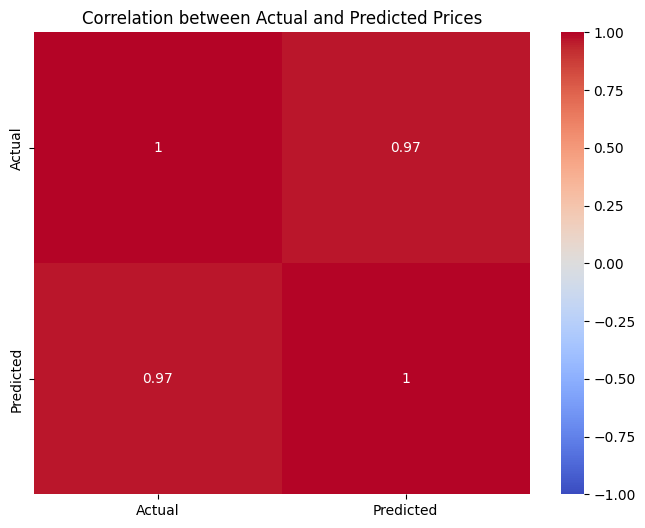

In [10]:
import seaborn as sns

heatmap_data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Actual and Predicted Prices')
plt.show()

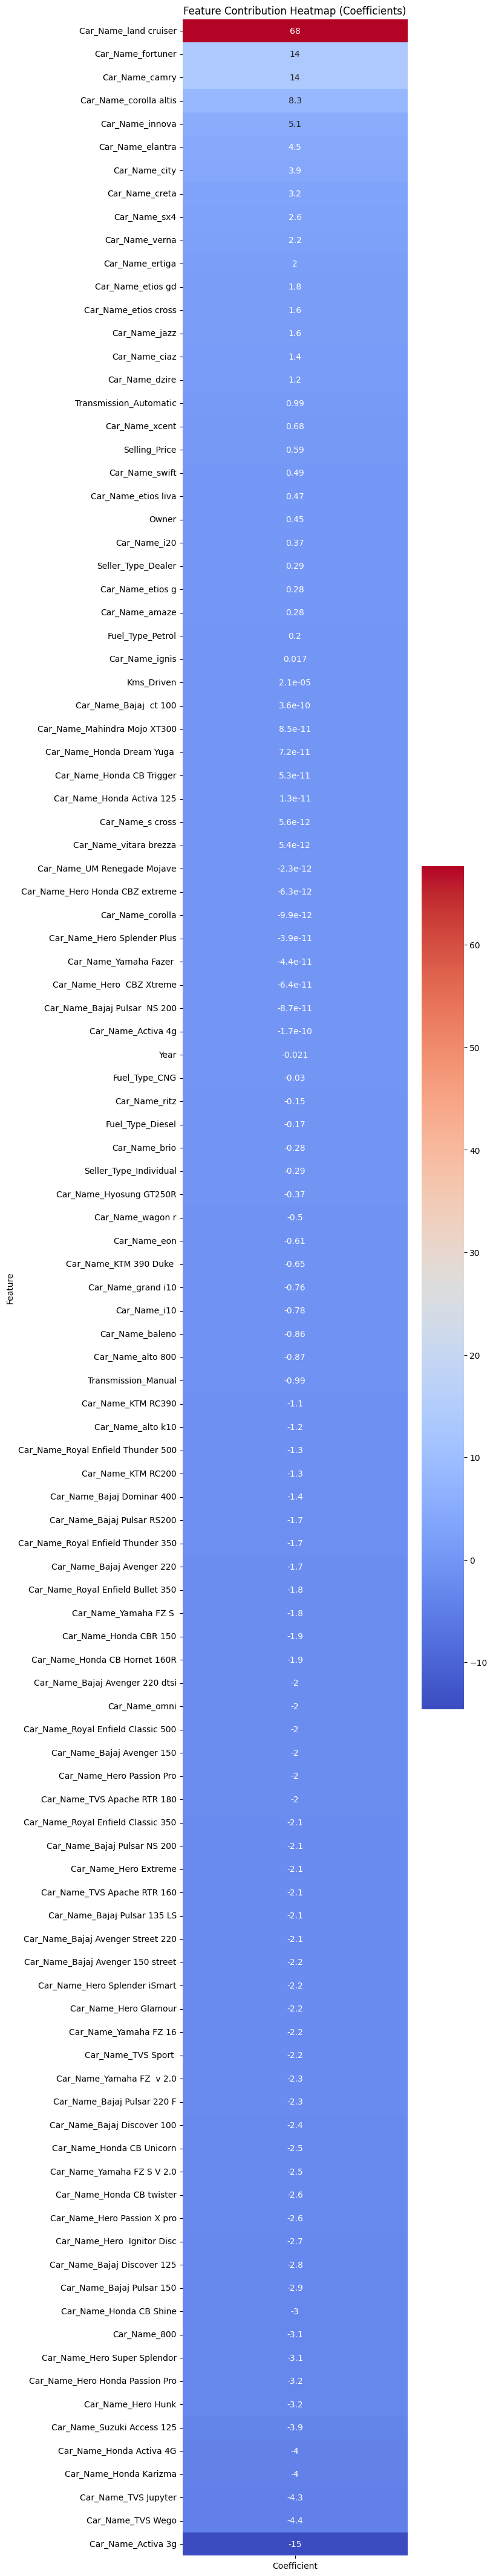

In [13]:
coefficients = model.coef_
features = X_train.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute coefficient for better visualization
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# Create a dataframe with features as index and a single column of abs coefficients
heatmap_data = coef_df_sorted.set_index('Feature')[['Coefficient']]

plt.figure(figsize=(6, len(features) * 0.5))  # Adjust size based on number of features
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Feature Contribution Heatmap (Coefficients)')
plt.show()

